### Importing Necessary Library and Modules

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
Hierchy_df = df.copy()

In [7]:
DBScan_df = df.copy()

In [8]:
Hierchy_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
DBScan_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Overview of Cluster may be present in dataset

Text(0, 0.5, 'petal_width')

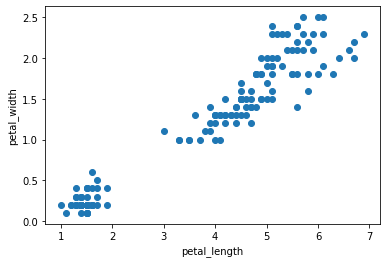

In [10]:
plt.scatter(df.petal_length,df.petal_width)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

### Elbow Plot - To Find The Correct Number Of Cluster Present In Dataset

In [11]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal_length','petal_width']])
    sse.append(km.inertia_)

In [12]:
sse

[550.6434666666667,
 86.40394533571003,
 31.38775897435898,
 19.48238901098901,
 13.933308757908758,
 11.087052341896278,
 9.26013825208608,
 7.683419523446297,
 6.472894541406307]

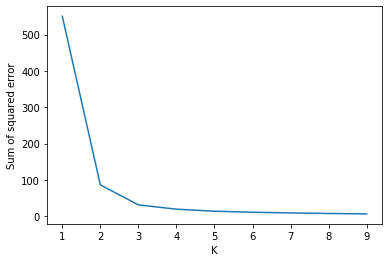

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
df['cluster'] = y_predicted
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor,0
96,5.7,2.9,4.2,1.3,Iris-versicolor,0
97,6.2,2.9,4.3,1.3,Iris-versicolor,0
98,5.1,2.5,3.0,1.1,Iris-versicolor,0


In [16]:
df['cluster'].value_counts()

0    52
2    50
1    48
Name: cluster, dtype: int64

In [17]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [5.59583333, 2.0375    ],
       [1.464     , 0.244     ]])

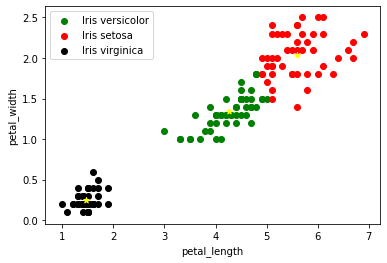

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.petal_length,df1.petal_width,color='green',label='Iris versicolor')
plt.scatter(df2.petal_length,df2.petal_width,color='red',label='Iris setosa')
plt.scatter(df3.petal_length,df3.petal_width,color='black',label='Iris virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(["Iris versicolor", "Iris setosa" , "Iris virginica"])

### Preprocessing using min max scaler

In [19]:
scaler = MinMaxScaler()

scaler.fit(df[['petal_width']])
df['petal_width'] = scaler.transform(df[['petal_width']])

scaler.fit(df[['petal_length']])
df['petal_length'] = scaler.transform(df[['petal_length']])

In [20]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,0.067797,0.041667,Iris-setosa,2
1,4.9,3.0,0.067797,0.041667,Iris-setosa,2
2,4.7,3.2,0.050847,0.041667,Iris-setosa,2
3,4.6,3.1,0.084746,0.041667,Iris-setosa,2
4,5.0,3.6,0.067797,0.041667,Iris-setosa,2


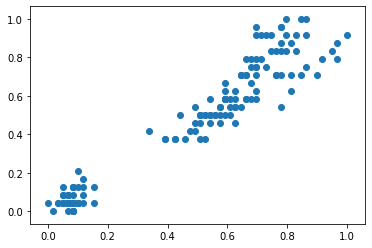

In [21]:
plt.scatter(df.petal_length,df.petal_width)

In [23]:
plt.figure(figsize=(15,7))
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<Figure size 1080x504 with 0 Axes>

In [24]:
df['cluster'] = y_predicted
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,0.067797,0.041667,Iris-setosa,1
1,4.9,3.0,0.067797,0.041667,Iris-setosa,1
2,4.7,3.2,0.050847,0.041667,Iris-setosa,1
3,4.6,3.1,0.084746,0.041667,Iris-setosa,1
4,5.0,3.6,0.067797,0.041667,Iris-setosa,1


In [25]:
df['cluster'].value_counts()

2    52
1    50
0    48
Name: cluster, dtype: int64

In [26]:
km.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07864407, 0.06      ],
       [0.55867014, 0.51041667]])

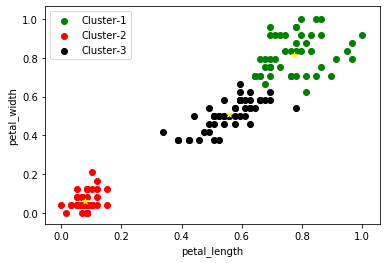

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.petal_length,df1.petal_width,color='green',)
plt.scatter(df2.petal_length,df2.petal_width,color='red')
plt.scatter(df3.petal_length,df3.petal_width,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(["Cluster-1", "Cluster-2","Cluster-3"])

## Principle Component Analysis

### 1. Do Standard Scalling or Min Max Scalling from sklearn.preprocessing library.
### 2. Use PCA Module from sklearn.decomposition library.

## PCA - Reduce the 4D or 4  features into 2 features (2D) and create new vector space.

In [27]:
df.head()

In [28]:
Step1
scaler = MinMaxScaler()

scaler.fit(df[['petal_width']])
df['petal_width'] = scaler.transform(df[['petal_width']])

scaler.fit(df[['petal_length']])
df['petal_length'] = scaler.transform(df[['petal_length']])

scaler.fit(df[['sepal_width']])
df['sepal_width'] = scaler.transform(df[['sepal_width']])

scaler.fit(df[['sepal_length']])
df['sepal_length'] = scaler.transform(df[['sepal_length']])

In [29]:
df.head()

In [30]:
plt.scatter(df.petal_length,df.petal_width)

In [31]:
plt.scatter(df.sepal_length,df.sepal_width)

In [32]:
from sklearn.decomposition import PCA

In [33]:
# PCA=PCA(n_components=2)
PCA.fit(df[['sepal_length','sepal_width','petal_length','petal_width']])

In [34]:

df2=PCA.transform(df[['sepal_length','sepal_width','petal_length','petal_width']])

In [35]:
df2

In [36]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df2)
y_predicted

In [37]:
df['cluster'] = y_predicted
df.head()

In [38]:
df['cluster'].value_counts()

In [39]:
km.cluster_centers_

In [40]:
colors=["red","yellow","blue"]
l=[]
for i in range(len(y_predicted)):
    l.append(colors[y_predicted[i]])
print(l)

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(df2[:,0],df2[:,1],c=l)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

## Hierarchical Clustering

#### 1.Single Linkage [ Min Distance (Euclidean) ]
#### 2.Compelete Linkage [ Max Distance (Euclidean) ]

In [106]:
Hierchy_df.drop(['species'],axis=1,inplace=True)
Hierchy_df.shape

(150, 4)

In [107]:
Hierchy_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Figure size 1080x504 with 0 Axes>

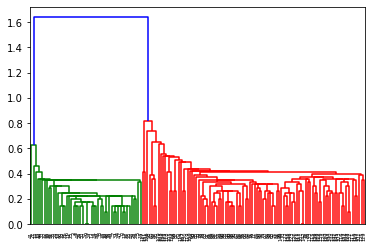

<Figure size 1080x504 with 0 Axes>

In [108]:
#single linkage
mergings=linkage(Hierchy_df,method='single', metric='euclidean')
dendrogram(mergings)
plt.figure(figsize=(15,7))

In [132]:
# From above we identified 2 Clusters
cluster_labels_single = cut_tree(mergings , n_clusters=2).reshape(-1,)
cluster_labels_single

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [133]:
Hierchy_df['cluster_labels_single'] = cluster_labels_single
Hierchy_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_labels_single,cluster_labels_complete
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [134]:
# Counting number of data points connected with two cluster
Hierchy_df['cluster_labels_single'].value_counts()

0    78
1    72
Name: cluster_labels_single, dtype: int64

<Figure size 1080x504 with 0 Axes>

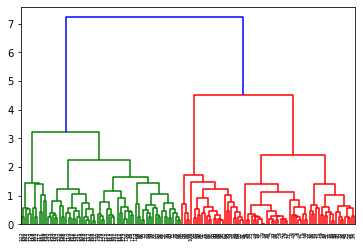

<Figure size 1080x504 with 0 Axes>

In [122]:
#complete linkage
mergings=linkage(Hierchy_df,method='complete', metric='euclidean')
dendrogram(mergings)
plt.figure(figsize=(15,7))

In [123]:
# From above we identified 3 Clusters
cluster_labels_complete = cut_tree(mergings , n_clusters=3).reshape(-1,)
cluster_labels_complete

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [124]:
Hierchy_df['cluster_labels_complete'] = cluster_labels_complete
Hierchy_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_labels_single,cluster_labels_complete
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [125]:
# Counting number of data points connected with three cluster
Hierchy_df['cluster_labels_complete'].value_counts()

1    72
0    50
2    28
Name: cluster_labels_complete, dtype: int64

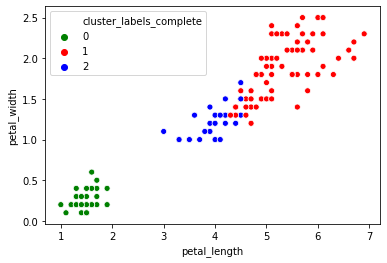

In [116]:
sns.scatterplot(x='petal_length',y='petal_width',hue='cluster_labels_complete',data=Hierchy_df,palette=['green','red','blue'])

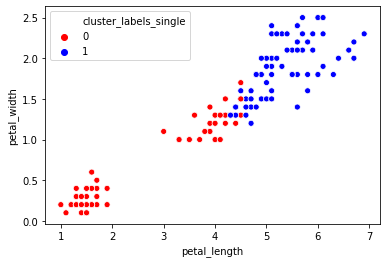

In [128]:
sns.scatterplot(x='petal_length',y='petal_width',hue='cluster_labels_single',data=Hierchy_df,palette=['red','blue'])

## DBScan Clustering

In [28]:
DBScan_df.drop(['species'],axis=1,inplace=True)
DBScan_df.shape

(150, 4)

In [29]:
DBScan_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0, 0.5, 'Feature 1')

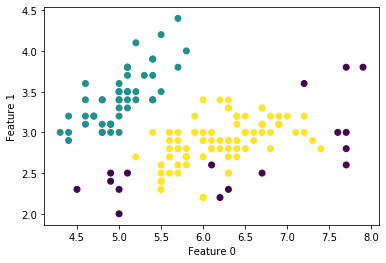

In [91]:
# cluster the data into three clusters
dbscan = DBSCAN(eps=0.5,
    min_samples=5,
    metric='euclidean')
clusters = dbscan.fit_predict(DBScan_df)
# plot the cluster assignments
plt.scatter(DBScan_df.iloc[:,0],DBScan_df.iloc[:,1],c = clusters)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [92]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [93]:
DBScan_df['cluster_labels_DBScan'] = clusters
DBScan_df['cluster_labels_DBScan'].value_counts()

 1    84
 0    49
-1    17
Name: cluster_labels_DBScan, dtype: int64

In [94]:
DBScan_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_labels_DBScan
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


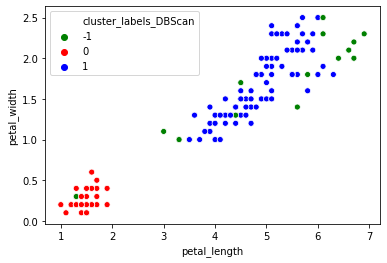

In [95]:
sns.scatterplot(x='petal_length',y='petal_width',hue='cluster_labels_DBScan',data=DBScan_df,palette=['green','red','blue'])

In [69]:
from sklearn.metrics.cluster import adjusted_rand_score

print("ARI of Kmeans : " , adjusted_rand_score(df['species'],y_predicted))

print("ARI of Hierarchical : " , adjusted_rand_score(Hierchy_df['species'],cluster_labels_complete))

print("ARI of DBScan : " , adjusted_rand_score(DBScan_df['species'],clusters))


ARI of Kmeans :  0.8856970310281228
ARI of Hierarchical :  0.64225125183629
ARI of DBScan :  0.5206185241703302
